In [1]:
import findspark
findspark.init()

import pyspark.pandas as pspd
%matplotlib inline

/opt/spark/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
psdf = pspd.read_csv('../data/raw/vgsales.csv')
psdf_raw = pspd.read_csv('../data/raw/vgsales.csv')
psdf.head()

23/08/16 16:12:14 WARN Utils: Your hostname, vmserver resolves to a loopback address: 127.0.1.1; using 192.168.0.102 instead (on interface enp0s3)
23/08/16 16:12:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/08/16 16:12:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Contagem de registros ausentes

In [3]:
psdf.isna().sum()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [4]:
psdf.isnull().sum()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [5]:
psdf[psdf['Publisher'].equals("N/A")].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
470,471,wwe Smackdown vs. Raw 2006,PS2,N/A,Fighting,N/A,1.57,1.02,0.0,0.41,3.00
1303,1305,Triple Play 99,PS,N/A,Sports,N/A,0.81,0.55,0.0,0.10,1.46
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,N/A,0.87,0.32,0.0,0.02,1.21
2222,2224,Bentley's Hackpack,GBA,2005,Misc,N/A,0.67,0.25,0.0,0.02,0.93
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,N/A,0.46,0.17,0.0,0.01,0.64


In [6]:
psdf.equals("N/A").sum()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Deletando todas as rows com valor 'N/A'
psdf = psdf.where(psdf['Year'] != 'N/A')
psdf = psdf.where(psdf['Publisher'] != 'N/A').dropna()

### Contagens nos registros

In [8]:
#Número de linhas no DataFrame
psdf.count()

/opt/spark/python/pyspark/pandas/internal.py:1573: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  fields = [
/opt/spark/python/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Rank            16291
Name            16291
Platform        16291
Year            16291
Genre           16291
Publisher       16291
NA_Sales        16291
EU_Sales        16291
JP_Sales        16291
Other_Sales     16291
Global_Sales    16291
dtype: int64

In [9]:
psdf['Platform'].unique().head()

0    3DO
1     PC
2    PS3
3    NES
4     PS
Name: Platform, dtype: object

In [10]:
psdf['Genre'].unique()

0        Adventure
1           Sports
2           Racing
3     Role-Playing
4          Shooter
5             Misc
6         Platform
7           Puzzle
8         Fighting
9           Action
10        Strategy
11      Simulation
Name: Genre, dtype: object

In [11]:
psdf['Publisher'].unique().head()

0           Funbox Media
1            Media Rings
2    Iceberg Interactive
3            Tigervision
4      bitComposer Games
Name: Publisher, dtype: object

### Agrupamento com índice multinivel

In [12]:
df_groupby1 = psdf.sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre', 'Year'])

df_groupby2 = psdf.sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])

df_groupby3 = psdf.where((psdf['Platform'] == '2600')).sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])

In [13]:
# Selecionando colunas 
df_groupby2[['Name', 'Genre', 'Year', 'Publisher', 'Global_Sales','Platform']].head(1).sort_values(by=['Global_Sales'], ascending=False).head()

,Name,Genre,Year,Publisher,Global_Sales,Platform
0,Wii Sports,Sports,2006,Nintendo,82.74,Wii
1,Super Mario Bros.,Platform,1985,Nintendo,40.24,NES
2,Mario Kart Wii,Racing,2008,Nintendo,35.82,Wii
4,Pokemon Red/Pokemon Blue,Role-Playing,1996,Nintendo,31.37,GB
5,Tetris,Puzzle,1989,Nintendo,30.26,GB


In [14]:
#Somatório de jogos mais vendidos no ano por genero de cada plataforma
df_groupby1['Global_Sales'].sum().head()

Platform  Genre     Year
X360      Shooter   2014    11.64
SNES      Misc      1992     2.75
XB        Racing    2003     8.71
SAT       Fighting  1997     0.65
          Racing    1996     0.11
Name: Global_Sales, dtype: float64

In [15]:
#Somatório de genero de cada plataforma
df_groupby2['Global_Sales'].sum().head()

Platform  Genre   
PS        Action      125.74
NES       Puzzle       21.00
WiiU      Strategy      1.24
GBA       Platform     78.08
Wii       Fighting     23.82
Name: Global_Sales, dtype: float64

In [16]:
#Somatório de generos de cada plataforma
pspd.DataFrame(df_groupby2['Global_Sales'].sum()).head()

,,Global_Sales
Platform,Genre,
PS,Action,125.74
NES,Puzzle,21.00
WiiU,Strategy,1.24
GBA,Platform,78.08
Wii,Fighting,23.82


In [17]:
#Contagem de jogos no ano por gênero de cada plataforma
df_agroup1 = pspd.DataFrame(df_groupby1['Name'].count())
df_agroup1.rename(columns={'Name': 'Games_Count'}, inplace=True)
df_agroup1.sort_index(0, ascending=True).head(10)

Games_Count
Platform Genre     Year             
2600     Action    1980            1
                   1981           25
                   1982           18
                   1983            7
                   1987            2
                   1988            1
                   1989            1
         Adventure 1983            1
         Fighting  1980            1
         Misc      1980            4

In [18]:
#Contagem de jogos por genero de cada plataforma
df_agroup2 = pspd.DataFrame(df_groupby2['Name'].count())
df_agroup2.rename(columns={'Name': 'Games_Count'}, inplace=True)
df_agroup2.sort_index(0, ascending=True).head(10)

Games_Count
Platform Genre                  
2600     Action               55
         Adventure             1
         Fighting              1
         Misc                  5
         Platform              9
         Puzzle                8
         Racing                4
         Shooter              22
         Simulation            1
         Sports               10

In [19]:
#Testando possibilidades
for index, row in df_agroup2.loc['NG'].sort_index(0, ascending=True).iterrows():
    print(index, type(index), row.values, type(row.values))

    
df_agroup2.loc['NG'].loc['Fighting']

Fighting <class 'str'> [11] <class 'numpy.ndarray'>
Sports <class 'str'> [1] <class 'numpy.ndarray'>


Games_Count    11
Name: Fighting, dtype: int64

In [20]:
psdf[(psdf['Platform']=='NG') & (psdf['Genre']=='Fighting')].sort_values(by='Global_Sales', ascending=False).head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6681,6683.0,Samurai Shodown II,NG,1994,Fighting,SNK,0.0,0.0,0.25,0.0,0.25
7045,7047.0,The King of Fighters '95 (CD),NG,1994,Fighting,SNK,0.0,0.0,0.23,0.0,0.23
7498,7500.0,The King of Fighters '95,NG,1995,Fighting,SNK,0.0,0.0,0.20,0.0,0.20
7553,7555.0,Samurai Spirits (CD),NG,1994,Fighting,SNK,0.0,0.0,0.20,0.0,0.20
9196,9198.0,The King of Fighters '94 (CD),NG,1993,Fighting,SNK,0.0,0.0,0.14,0.0,0.14


In [21]:
#Testando possibilidades
#df_teste = pspd.DataFrame(df_groupby1['Name'].count())
tuple_list = []

#for index, row in df_teste.loc['PS4'].sort_index(0, ascending=False).iterrows():
for index, row in pspd.DataFrame(df_groupby1['Name'].count()).loc['PS4'].sort_index(0, ascending=False).iterrows():
    #print(index[0])
    tuple_list.append(['PS4', tuple([int(index[1]), int(row.Name)]), int(index[1]), int(row.Name)])

print(type(tuple_list))
print(tuple_list)

<class 'list'>
[['PS4', (2016, 1), 2016, 1], ['PS4', (2015, 1), 2015, 1], ['PS4', (2014, 2), 2014, 2], ['PS4', (2013, 1), 2013, 1], ['PS4', (2016, 13), 2016, 13], ['PS4', (2015, 15), 2015, 15], ['PS4', (2014, 11), 2014, 11], ['PS4', (2013, 4), 2013, 4], ['PS4', (2016, 3), 2016, 3], ['PS4', (2015, 2), 2015, 2], ['PS4', (2016, 13), 2016, 13], ['PS4', (2015, 11), 2015, 11], ['PS4', (2014, 7), 2014, 7], ['PS4', (2013, 3), 2013, 3], ['PS4', (2017, 1), 2017, 1], ['PS4', (2016, 13), 2016, 13], ['PS4', (2015, 25), 2015, 25], ['PS4', (2014, 8), 2014, 8], ['PS4', (2016, 7), 2016, 7], ['PS4', (2015, 5), 2015, 5], ['PS4', (2014, 4), 2014, 4], ['PS4', (2013, 1), 2013, 1], ['PS4', (2015, 1), 2015, 1], ['PS4', (2016, 4), 2016, 4], ['PS4', (2015, 2), 2015, 2], ['PS4', (2014, 2), 2014, 2], ['PS4', (2013, 3), 2013, 3], ['PS4', (2016, 5), 2016, 5], ['PS4', (2015, 4), 2015, 4], ['PS4', (2014, 5), 2014, 5], ['PS4', (2013, 1), 2013, 1], ['PS4', (2016, 6), 2016, 6], ['PS4', (2015, 9), 2015, 9], ['PS4', (2014

In [22]:
#Contagem de jogos de luta lançadados por ano em cada plataforma
df_agroup1.xs("Fighting", level=1).sort_index(0, ascending=False).head(10)

Games_Count
Platform Year             
XOne     2016            2
         2015            3
         2013            2
XB       2006            3
         2005            8
         2004           12
         2003           10
         2002           10
         2001            1
X360     2015            1

In [23]:
#Contagem de jogos de todos os gêneros lançadados por ano em cada plataforma
df_agroup1.sort_index(0, ascending=False).head(10)

Games_Count
Platform Genre      Year             
XOne     Strategy   2016            1
                    2015            1
                    2013            1
         Sports     2016            9
                    2015           13
                    2014           10
                    2013            4
         Simulation 2016            1
                    2015            1
                    2013            1

In [24]:
#RPGs mais vendidos
df_rpg = psdf.where((psdf['Genre'] == 'Role-Playing')).dropna().sort_values('Global_Sales', ascending=False)
df_rpg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5.0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13.0,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21.0,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26.0,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27.0,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32


In [25]:
# Os 10 RPGs mais vendidos de 1997
df_rpg[df_rpg['Year'].eq('1997')].sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
66,67.0,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
630,631.0,Final Fantasy Tactics,PS,1997,Role-Playing,SquareSoft,0.93,0.12,1.34,0.06,2.45
1451,1453.0,SaGa Frontier,PS,1997,Role-Playing,SquareSoft,0.15,0.04,1.07,0.09,1.35
1643,1645.0,Chocobo no Fushigi Dungeon,PS,1997,Role-Playing,SquareSoft,0.00,0.00,1.14,0.08,1.22
1993,1995.0,Tales of Destiny,PS,1997,Role-Playing,Namco Bandai Games,0.09,0.06,0.83,0.07,1.04
2056,2058.0,Breath of Fire III,PS,1997,Role-Playing,Capcom,0.29,0.19,0.46,0.07,1.00
3226,3228.0,Final Fantasy VII International,PS,1997,Role-Playing,Square,0.00,0.00,0.59,0.04,0.63
3444,3446.0,Diablo,PS,1997,Role-Playing,Electronic Arts,0.29,0.19,0.07,0.04,0.58
3987,3989.0,RPG Maker,PS,1997,Role-Playing,ASCII Entertainment,0.11,0.07,0.29,0.03,0.50
4567,4569.0,Neon Genesis Evangelion 2nd Impression,SAT,1997,Role-Playing,Sega,0.00,0.00,0.42,0.00,0.42


---

In [26]:
plataforms = psdf['Platform'].unique().to_list()
print(plataforms)

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_list` loads all data into the driver's memory. It should only be used if the resulting list is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


['3DO', 'PC', 'PS3', 'NES', 'PS', 'DC', 'GEN', 'PS2', '3DS', 'PCFX', 'GG', 'WiiU', 'SNES', 'GB', 'SCD', 'N64', 'PS4', 'PSP', '2600', 'XOne', 'X360', 'GBA', 'WS', 'Wii', 'GC', 'PSV', 'XB', 'DS', 'TG16', 'NG', 'SAT']


#### Jogos mais vendidos de cada plataforma

In [27]:
#Top 1 de plataforma especifica
psdf.where((psdf['Platform'].equals('Wii'))).dropna().head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [28]:
#Top 1 de todas as plataforma
df_top_game_platforms_groupby = psdf[['Name', 'Genre', 'Platform', 'Publisher', 'Year', 'Global_Sales']].dropna().sort_values(by=['Global_Sales'], ascending=False).groupby(['Platform']) #.groupby(['Platform'])  #.sort_values(by=['Global_Sales'], ascending=False) #.groupby(['Genre']).max().dropna()
df_top_game_platforms_groupby.head(1).sort_values(by=['Global_Sales'], ascending=False).head()

,Name,Genre,Platform,Publisher,Year,Global_Sales
0,Wii Sports,Sports,Wii,Nintendo,2006,82.74
1,Super Mario Bros.,Platform,NES,Nintendo,1985,40.24
4,Pokemon Red/Pokemon Blue,Role-Playing,GB,Nintendo,1996,31.37
6,New Super Mario Bros.,Platform,DS,Nintendo,2006,30.01
15,Kinect Adventures!,Misc,X360,Microsoft Game Studios,2010,21.82


#### Jogos mais vendidos por gênero (especificar plataforma)

In [29]:
df_top_genre_groupby = psdf.where((psdf['Platform'] == 'PS3'))[['Name', 'Genre', 'Platform', 'Publisher', 'Year', 'Global_Sales']].dropna().sort_values(by=['Global_Sales'], ascending=False).groupby(['Genre']) #.groupby(['Platform'])  #.sort_values(by=['Global_Sales'], ascending=False) #.groupby(['Genre']).max().dropna()
df_top_genre_groupby[['Name', 'Genre', 'Publisher', 'Global_Sales']].head(1).sort_values(by=['Global_Sales'], ascending=False)

,Name,Genre,Publisher,Global_Sales
16,Grand Theft Auto V,Action,Take-Two Interactive,21.40
34,Call of Duty: Black Ops II,Shooter,Activision,14.03
54,Gran Turismo 5,Racing,Sony Computer Entertainment,10.77
112,FIFA 14,Sports,Electronic Arts,6.90
126,The Elder Scrolls V: Skyrim,Role-Playing,Bethesda Softworks,6.56
148,LittleBigPlanet,Platform,Sony Computer Entertainment,5.92
168,Minecraft,Misc,Sony Computer Entertainment,5.42
218,Assassin's Creed,Adventure,Ubisoft,4.83
274,Street Fighter IV,Fighting,Capcom,4.19
814,The Sims 3,Simulation,Electronic Arts,2.06


In [30]:
print(plataforms)

['3DO', 'PC', 'PS3', 'NES', 'PS', 'DC', 'GEN', 'PS2', '3DS', 'PCFX', 'GG', 'WiiU', 'SNES', 'GB', 'SCD', 'N64', 'PS4', 'PSP', '2600', 'XOne', 'X360', 'GBA', 'WS', 'Wii', 'GC', 'PSV', 'XB', 'DS', 'TG16', 'NG', 'SAT']


### Plots

#### Pie Charts (to_pandas)

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


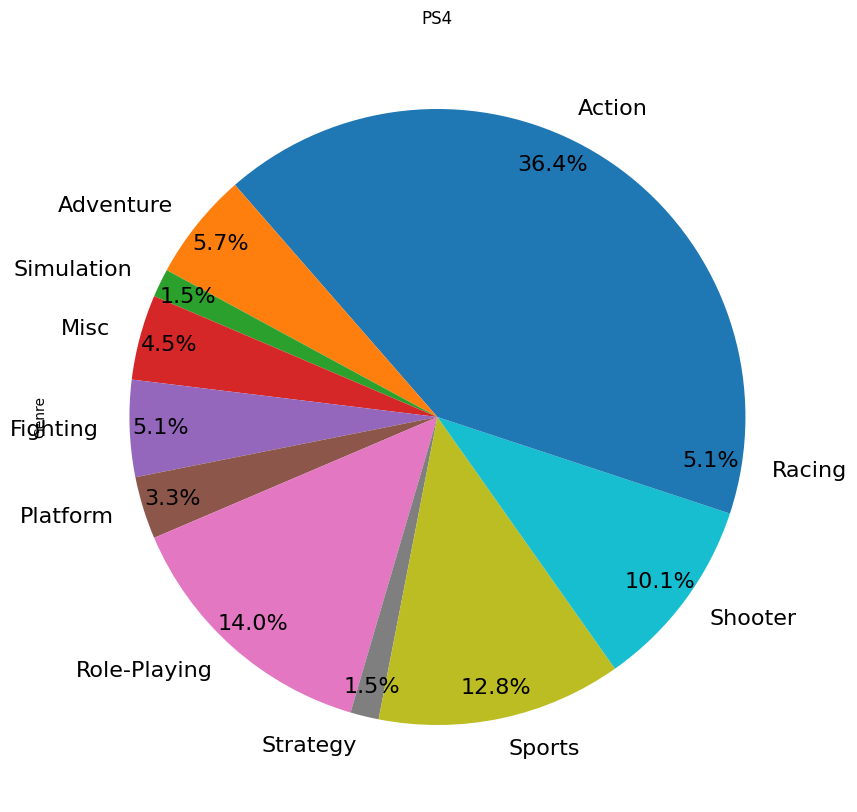

In [31]:
#Contagem de jogos por gênero (Porcentagem)

pie_df = pspd.DataFrame(psdf.sort_values(by=['Genre'], ascending=False).groupby(['Platform', 'Genre'])['Genre'].count()).xs('PS4',level=0)
pie_df = pie_df.where(pie_df['Genre'] > 1.5).dropna() # Somente vendas acima de 1.5% do total de copias para não quebrar o gráfico
plot = pie_df.to_pandas().plot.pie(y='Genre', figsize=(10,10), title='PS4', fontsize=16, pctdistance=0.9, autopct='%1.1f%%',legend=False)
fig = plot.get_figure()
fig.savefig("../../pyspark-video-game-analysis/data/plots/"+"Pie_Count_Genre_percent_"+"PS4"+".png")


/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


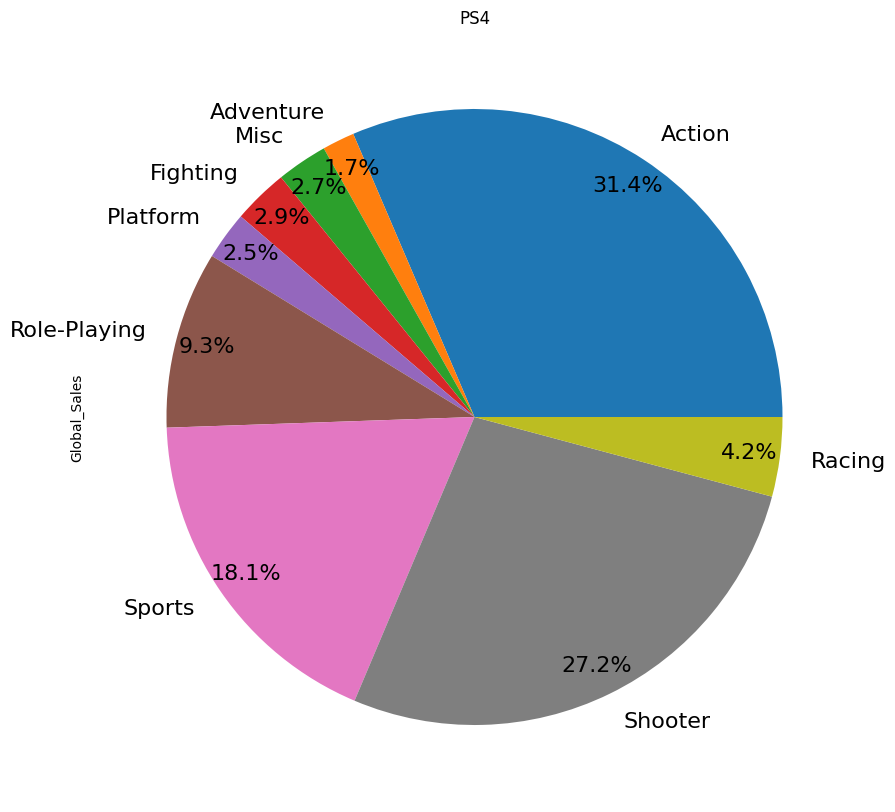

In [32]:
#Total de Vendas Globais por gênero (Porcentagem)

pie_df = pspd.DataFrame(psdf.sort_values(by=['Global_Sales'], ascending=False).groupby(['Platform', 'Genre'])['Global_Sales'].sum()).xs('PS4',level=0)
pie_df = pie_df.where(pie_df['Global_Sales'] > 1.5).dropna() # Somente vendas acima de 1.5% do total de copias para não quebrar o gráfico
plot = pie_df.to_pandas().plot.pie(y='Global_Sales', figsize=(10,10), title='PS4', fontsize=16, pctdistance=0.9, autopct='%1.1f%%',legend=False)
fig = plot.get_figure()
fig.savefig("../../pyspark-video-game-analysis/data/plots/"+"Pie_Global_Sales_Genre_percent_"+"PS4"+".png")


#### Bar Charts

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


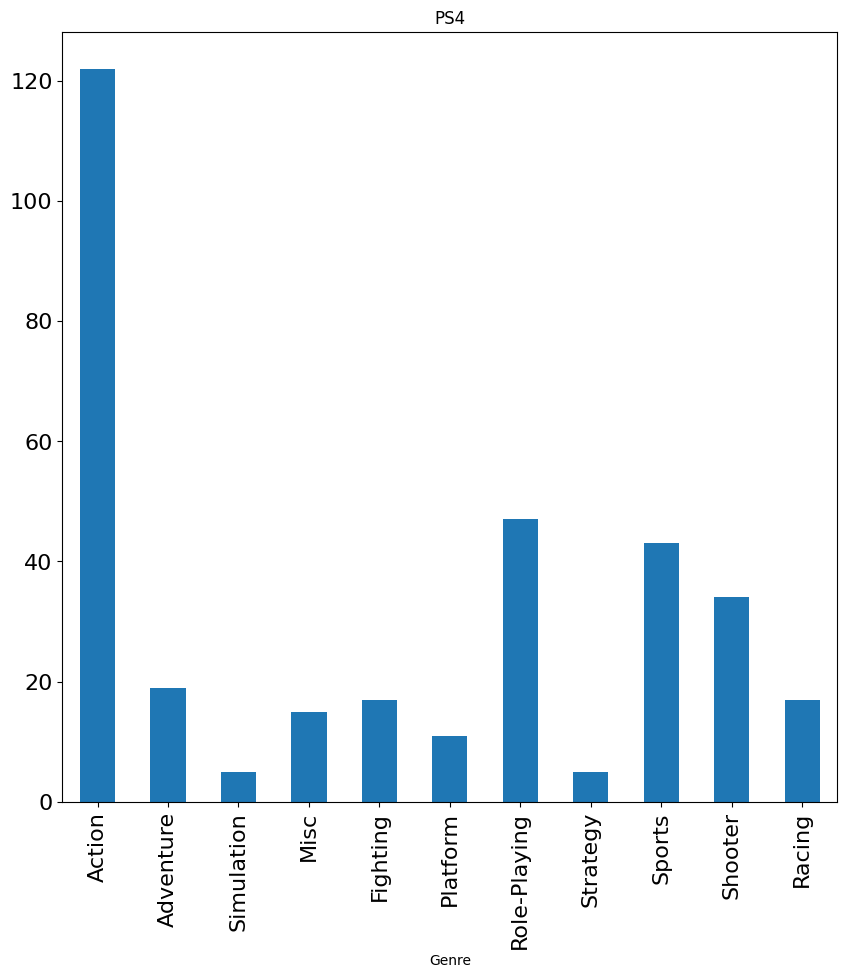

In [33]:
#Total de Vendas Globais por gênero (Porcentagem)

pie_df = pspd.DataFrame(psdf.sort_values(by=['Genre'], ascending=False).groupby(['Platform', 'Genre'])['Genre'].count()) #.xs('PS4',level=0)
pie_df = pie_df.xs('PS4',level=0)
pie_df = pie_df.where(pie_df['Genre'] > 1.5).dropna() # Somente vendas acima de 1.5% do total de copias para não quebrar o gráfico
plot = pie_df.to_pandas().plot.bar(y='Genre', figsize=(10,10), title='PS4', fontsize=16, legend=False)
fig = plot.get_figure()
fig.savefig("../../pyspark-video-game-analysis/data/plots/"+"Pie_Count_Genre_percent_"+"PS4"+".png")


In [34]:
import findspark
findspark.init()

import pyspark.pandas as pspd
%matplotlib inline
psdf = pspd.read_csv('../data/raw/vgsales.csv')
psdf_raw = pspd.read_csv('../data/raw/vgsales.csv')
psdf.head()
# Deletando todas as rows com valor 'N/A'
psdf = psdf.where(psdf['Year'] != 'N/A')
psdf = psdf.where(psdf['Publisher'] != 'N/A').dropna()

df_groupby1 = psdf.sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre', 'Year'])

df_groupby2 = psdf.sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])

df_groupby3 = psdf.where((psdf['Platform'] == '2600')).sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])

/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


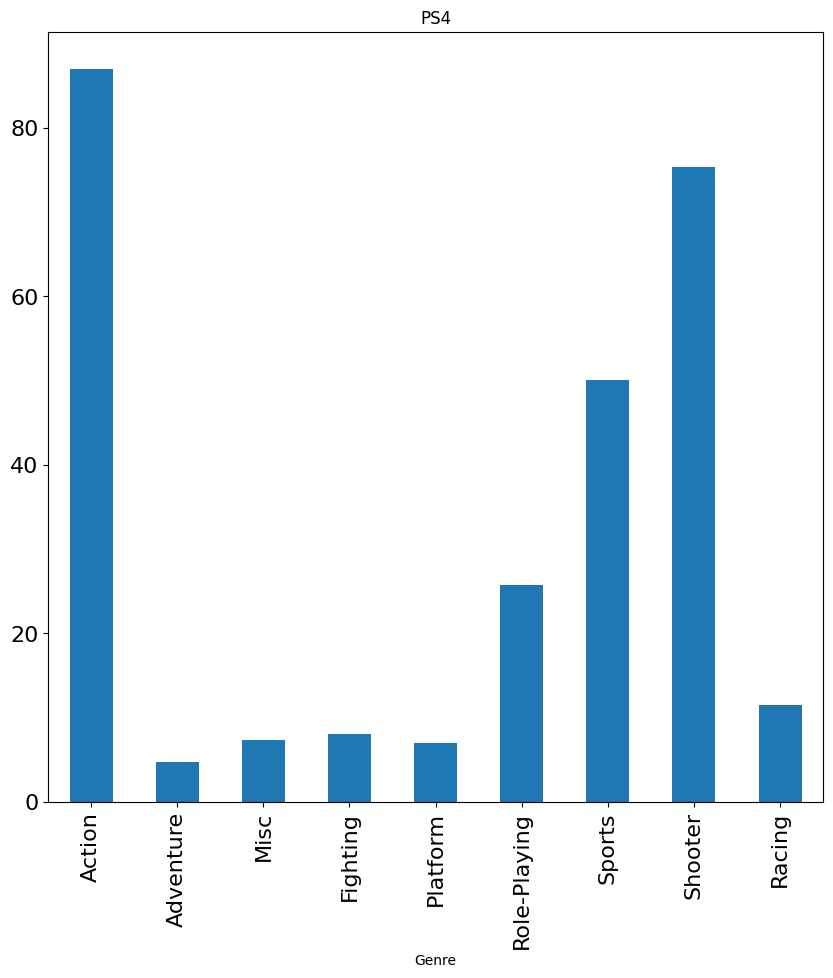

In [35]:
#Total de Vendas Globais por gênero (Porcentagem)

pie_df = pspd.DataFrame(psdf.sort_values(by=['Global_Sales'], ascending=False).groupby(['Platform', 'Genre'])['Global_Sales'].sum()) #.xs('PS4',level=0)
pie_df = pie_df.xs('PS4',level=0)
pie_df = pie_df.where(pie_df['Global_Sales'] > 1.5).dropna() # Somente vendas acima de 1.5% do total de copias para não quebrar o gráfico
plot = pie_df.to_pandas().plot.bar(y='Global_Sales', figsize=(10,10), title='PS4', fontsize=16, legend=False)
fig = plot.get_figure()
fig.savefig("../../pyspark-project-vgsales/data/charts/"+"Bar_Global_Sales_Genre_per_platform_percent_"+"PS4"+".png")


/opt/spark/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


FileNotFoundError: [Errno 2] No such file or directory: '../pyspark-project-vgsales/data/charts/Bar_count_Genre_per_year_percent_PS4.png'

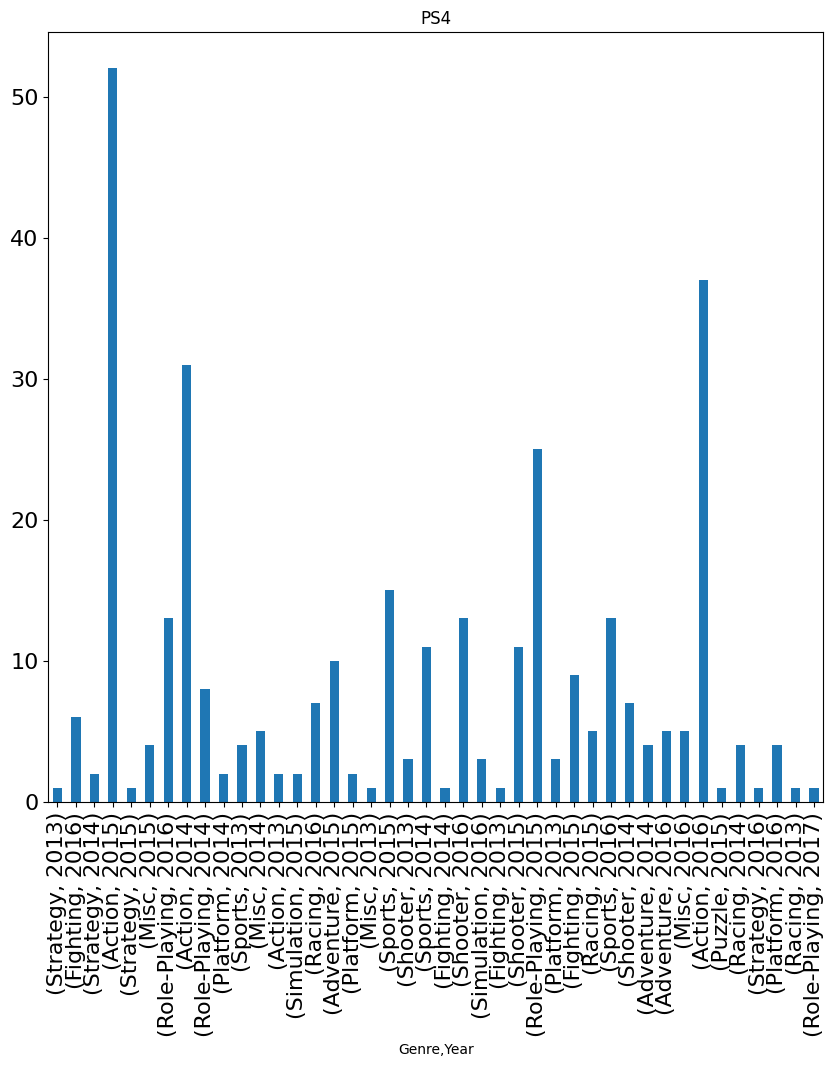

In [36]:
#Total de Vendas Globais por gênero (Porcentagem)

pie_df = pspd.DataFrame(psdf.sort_values(by=['Genre'], ascending=False).groupby(['Platform', 'Genre', 'Year'])['Genre'].count()) #.xs('PS4',level=0)
pie_df = pie_df.xs('PS4',level=0)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
plot = pie_df.to_pandas().plot.bar(y=['Genre'], figsize=(10,10), title='PS4', fontsize=16, legend=False)
fig = plot.get_figure()
fig.savefig("../pyspark-project-vgsales/data/charts/"+"Bar_count_Genre_per_year_percent_"+"PS4"+".png")

pie_df

#fig.savefig("../pyspark-project-vgsales/data/charts/"+"Bar_count_per_Year_"+"PS4"+".png")

In [ ]:
#Total de Vendas Globais por gênero (Porcentagem)

pie_df = pspd.DataFrame(psdf.sort_values(by=['Genre'], ascending=False).groupby(['Platform', 'Year'])['Genre'].count()) #.xs('PS4',level=0)
pie_df = pie_df.xs('PS4',level=0)
pie_df = pie_df.sort_index(0, ascending=True,level=0)
plot = pie_df.to_pandas().plot.bar(y=['Genre'], figsize=(10,10), title='PS4', fontsize=16, legend=False)
fig = plot.get_figure()
fig.savefig("../pyspark-project-vgsales/data/charts/"+"Bar_count_games_per_year_percent_"+"PS4"+".png")

#pie_df

#fig.savefig("../pyspark-project-vgsales/data/charts/"+"Bar_count_games_per_Year_"+"PS4"+".png")

In [91]:
df_groupby3 = psdf.where((psdf['Platform'] == 'PS3')).sort_values(by=['Global_Sales'], ascending=False).dropna().groupby(['Platform', 'Genre'])
#df_groupby3
df_groupby3[['Name', 'Genre', 'Year', 'Publisher', 'Global_Sales', 'Platform']].head(1).sort_values(by=['Global_Sales'], ascending=False).head(10)

,Name,Genre,Year,Publisher,Global_Sales,Platform
16,Grand Theft Auto V,Action,2013,Take-Two Interactive,21.40,PS3
34,Call of Duty: Black Ops II,Shooter,2012,Activision,14.03,PS3
54,Gran Turismo 5,Racing,2010,Sony Computer Entertainment,10.77,PS3
112,FIFA 14,Sports,2013,Electronic Arts,6.90,PS3
126,The Elder Scrolls V: Skyrim,Role-Playing,2011,Bethesda Softworks,6.56,PS3
148,LittleBigPlanet,Platform,2008,Sony Computer Entertainment,5.92,PS3
168,Minecraft,Misc,2014,Sony Computer Entertainment,5.42,PS3
218,Assassin's Creed,Adventure,2007,Ubisoft,4.83,PS3
274,Street Fighter IV,Fighting,2009,Capcom,4.19,PS3
814,The Sims 3,Simulation,2010,Electronic Arts,2.06,PS3


In [61]:
psdf['Platform'].unique()

0      3DO
1       PC
2      PS3
3      NES
4       PS
5       DC
6      GEN
7      PS2
8      3DS
9     PCFX
10      GG
11    WiiU
12    SNES
13      GB
14     SCD
15     N64
16     PS4
17     PSP
18    2600
19    XOne
20    X360
21     GBA
22      WS
23     Wii
24      GC
25     PSV
26      XB
27      DS
28    TG16
29      NG
30     SAT
Name: Platform, dtype: object